In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# خوندن دیتا از دیتاست
df = pd.read_csv('path_to_dataset.csv')

# مشاهده 10 ردیف اول
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


In [6]:
# دیتا تایپ ستونها
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [7]:
# اطلاعات کلی دیتاست
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [8]:
# تعداد مقادیر گم شده هر ستون
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [16]:
# گرفتن نسخه بک آپ از دیتاست
df_backup = df.copy()
# حذف تعدادی از ستونها
df.drop(columns=['User ID','Device Model','User Behavior Class'], inplace=True)
df.head(10)

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Android,393,6.4,1872,67,1122,40,Male
1,Android,268,4.7,1331,42,944,47,Female
2,Android,154,4.0,761,32,322,42,Male
3,Android,239,4.8,1676,56,871,20,Male
4,iOS,187,4.3,1367,58,988,31,Female
5,Android,99,2.0,940,35,564,31,Male
6,Android,350,7.3,1802,66,1054,21,Female
7,Android,543,11.4,2956,82,1702,31,Male
8,Android,340,7.7,2138,75,1053,42,Female
9,iOS,424,6.6,1957,75,1301,42,Male


In [18]:
# تعداد سطرهای دیتاست اصلی
print(len(df))

700


In [7]:
# ستونهای عددی برای بررسی داده های پرت
numeric_features = ['Age', 'Data Usage (MB/day)', 'Number of Apps Installed', 
                    'Battery Drain (mAh/day)', 'Screen On Time (hours/day)', 
                    'App Usage Time (min/day)']
# گرفتن نسخه بک آپ از دیتاست
filtered_data = df.copy()

for feature in numeric_features:
    # محاسبه چارک اول وسوم
    Q1 = filtered_data[feature].quantile(0.25)
    Q3 = filtered_data[feature].quantile(0.75)
    # محاسبه iqr
    IQR = Q3 - Q1
    #داده های خارج از این محدوده بعنوان داده پرت حذف میشوند
    filtered_data = filtered_data[(filtered_data[feature] >= (Q1 - 1.5 * IQR)) & 
                                  (filtered_data[feature] <= (Q3 + 1.5 * IQR))]
# تعداد سطرهای باقی مانده پس از حذف داده های پرت
remaining_rows = len(filtered_data)
print(filtered_data)

print(f"Original row count: {len(df)}")
print(f"Filtered row count: {remaining_rows}")
# درصد داده های باقیمانده بعد از حذف داده های پرت
print(f"Remaining data percentage: {remaining_rows / len(df) * 100:.2f}%")

     User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh

In [16]:
# اطمینان از منحصر به فرد بودن داده ها
duplicates = filtered_data[filtered_data.duplicated()]
# نشان دادن ردیف های تکراری
print(duplicates)

Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, User Behavior Class]
Index: []


In [17]:
#تغییر نوع داده ها برای کاهش حافظه مصرفی و بهینه سازی
# تغییر به عدد صحیح
df['Age'] = df['Age'].astype('int')  
# تغییر به category
df['Gender'] = df['Gender'].astype('category')  
df['Operating System'] = df['Operating System'].astype('category')

# تغییر به اعشاری
numeric_features = ['Data Usage (MB/day)', 'Number of Apps Installed', 'Battery Drain (mAh/day)',
                   'Screen On Time (hours/day)', 'App Usage Time (min/day)']
for col in numeric_features:
    df[col] = df[col].astype(float)
# نمایش داده ها بعد از تغییر
print(df.dtypes)

User ID                          int64
Device Model                    object
Operating System              category
App Usage Time (min/day)       float64
Screen On Time (hours/day)     float64
Battery Drain (mAh/day)        float64
Number of Apps Installed       float64
Data Usage (MB/day)            float64
Age                              int32
Gender                        category
User Behavior Class              int64
dtype: object


In [21]:
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,393.0,6.4,1872.0,67.0,1122.0,40,1,4
1,2,OnePlus 9,0,268.0,4.7,1331.0,42.0,944.0,47,0,3
2,3,Xiaomi Mi 11,0,154.0,4.0,761.0,32.0,322.0,42,1,2
3,4,Google Pixel 5,0,239.0,4.8,1676.0,56.0,871.0,20,1,3
4,5,iPhone 12,1,187.0,4.3,1367.0,58.0,988.0,31,0,3
5,6,Google Pixel 5,0,99.0,2.0,940.0,35.0,564.0,31,1,2
6,7,Samsung Galaxy S21,0,350.0,7.3,1802.0,66.0,1054.0,21,0,4
7,8,OnePlus 9,0,543.0,11.4,2956.0,82.0,1702.0,31,1,5
8,9,Samsung Galaxy S21,0,340.0,7.7,2138.0,75.0,1053.0,42,0,4
9,10,iPhone 12,1,424.0,6.6,1957.0,75.0,1301.0,42,1,4


In [11]:
# تبدیل داده های متنی به عدد برای تحلیل
# (مرد= 1 و زن = 0)
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])
# (0=اندروید)(ios=1)
Operating_encoder = LabelEncoder()
df['Operating System'] = Operating_encoder.fit_transform(df['Operating System'])
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,393,6.4,1872,67,1122,40,1,4
1,2,OnePlus 9,0,268,4.7,1331,42,944,47,0,3
2,3,Xiaomi Mi 11,0,154,4.0,761,32,322,42,1,2
3,4,Google Pixel 5,0,239,4.8,1676,56,871,20,1,3
4,5,iPhone 12,1,187,4.3,1367,58,988,31,0,3
5,6,Google Pixel 5,0,99,2.0,940,35,564,31,1,2
6,7,Samsung Galaxy S21,0,350,7.3,1802,66,1054,21,0,4
7,8,OnePlus 9,0,543,11.4,2956,82,1702,31,1,5
8,9,Samsung Galaxy S21,0,340,7.7,2138,75,1053,42,0,4
9,10,iPhone 12,1,424,6.6,1957,75,1301,42,1,4


In [3]:
# تاثیر سیستم عامل و جنسیت بر میزان استفاده از برنامه ها
plt.figure(figsize=(12, 6))
sns.barplot(x='Operating System', y='App Usage Time (min/day)',hue='Gender', data=df, palette=["#E7CCCC", "#A5BFCC"])
plt.title('App Usage Time by Operating System and Gender')
plt.xlabel('Operating System')
plt.ylabel('App Usage Time (min/day)')
plt.legend(title="Gender", loc='upper center')
plt.grid(axis='y', color='lightgray', alpha=0.5)
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

<Figure size 1200x600 with 0 Axes>

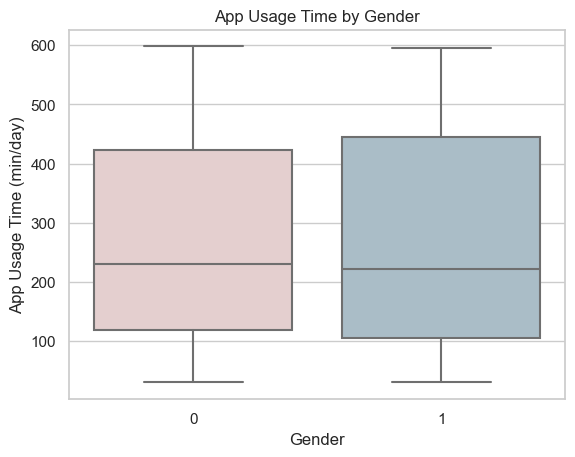

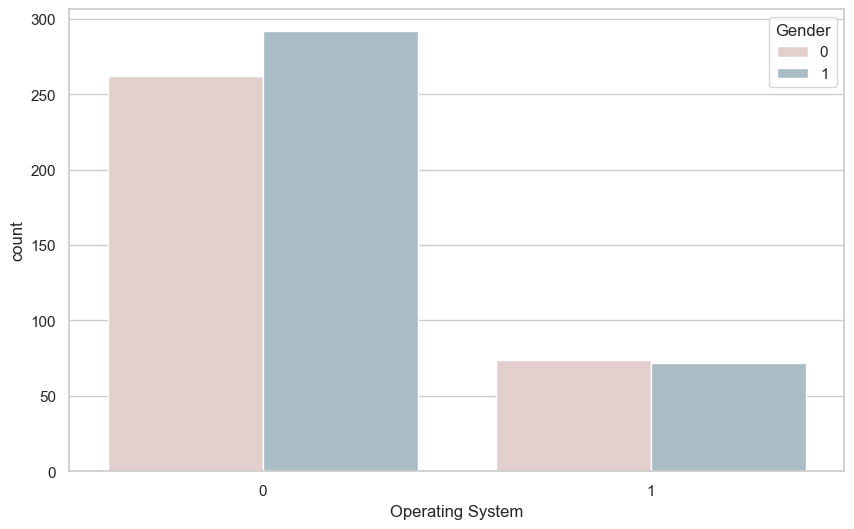

In [40]:
# نمایش توزیع و پراکندگی در App Usage Time
sns.boxplot(data=df, x='Gender', y='App Usage Time (min/day)', palette=["#E7CCCC", "#A5BFCC"])
plt.title('App Usage Time by Gender')
plt.xlabel('Gender')
plt.ylabel('App Usage Time (min/day)')
plt.show()

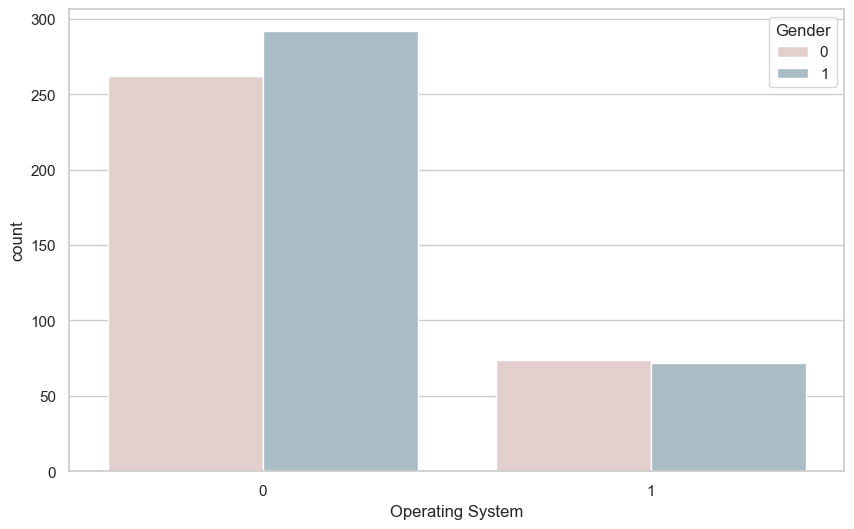

In [41]:
# شمارش کاربران هر سیستم عامل
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x="Operating System", hue='Gender', data=df,palette='blend:#E7CCCC,#A5BFCC')

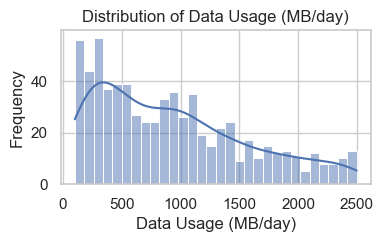

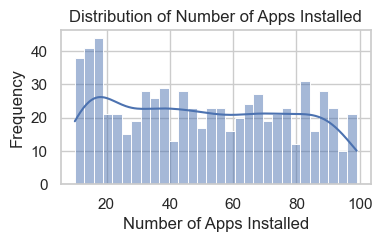

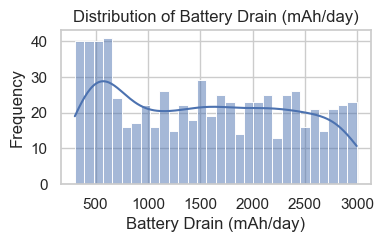

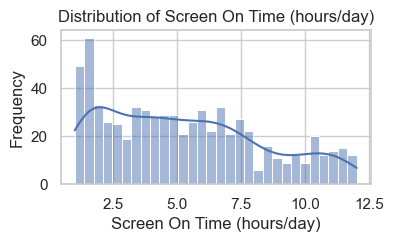

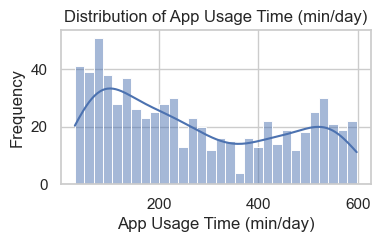

In [42]:
# بررسی توزیع داده ها
for col in numeric_features:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

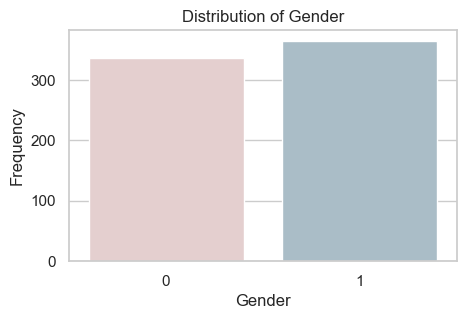

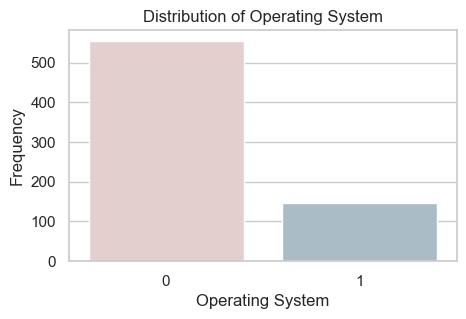

In [44]:
# بررسی توزیع داده ها برای ستونها با داده ی category 
for col in ['Gender', 'Operating System']: 
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col], palette=["#E7CCCC", "#A5BFCC"])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

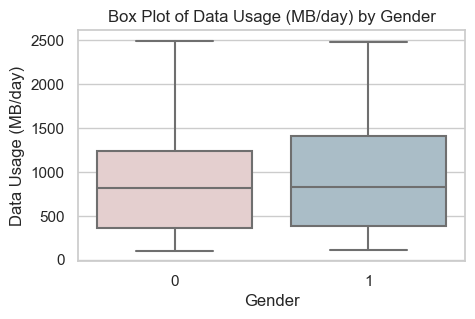

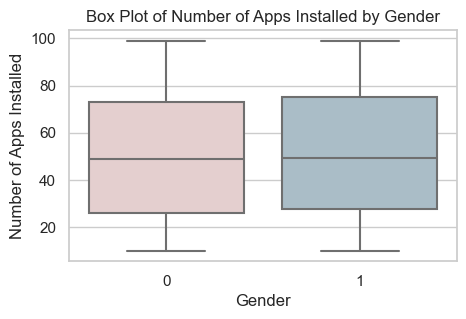

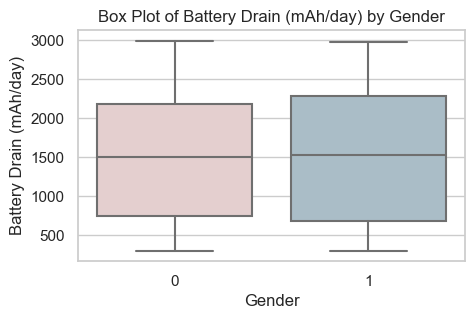

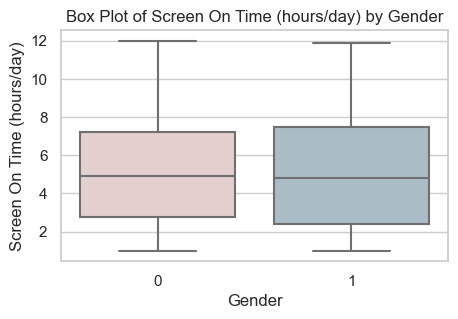

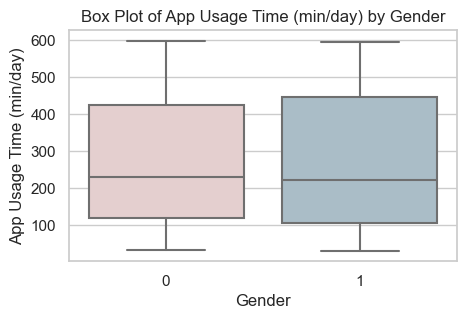

In [45]:
# ارتباط ستونهای عددی با ستونهای category 
for col in numeric_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df['Gender'], y=df[col], palette=["#E7CCCC", "#A5BFCC"])
    plt.title(f"Box Plot of {col} by Gender")
    plt.xlabel('Gender')
    plt.ylabel(col)
    plt.show()

C:\Users\AC30\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


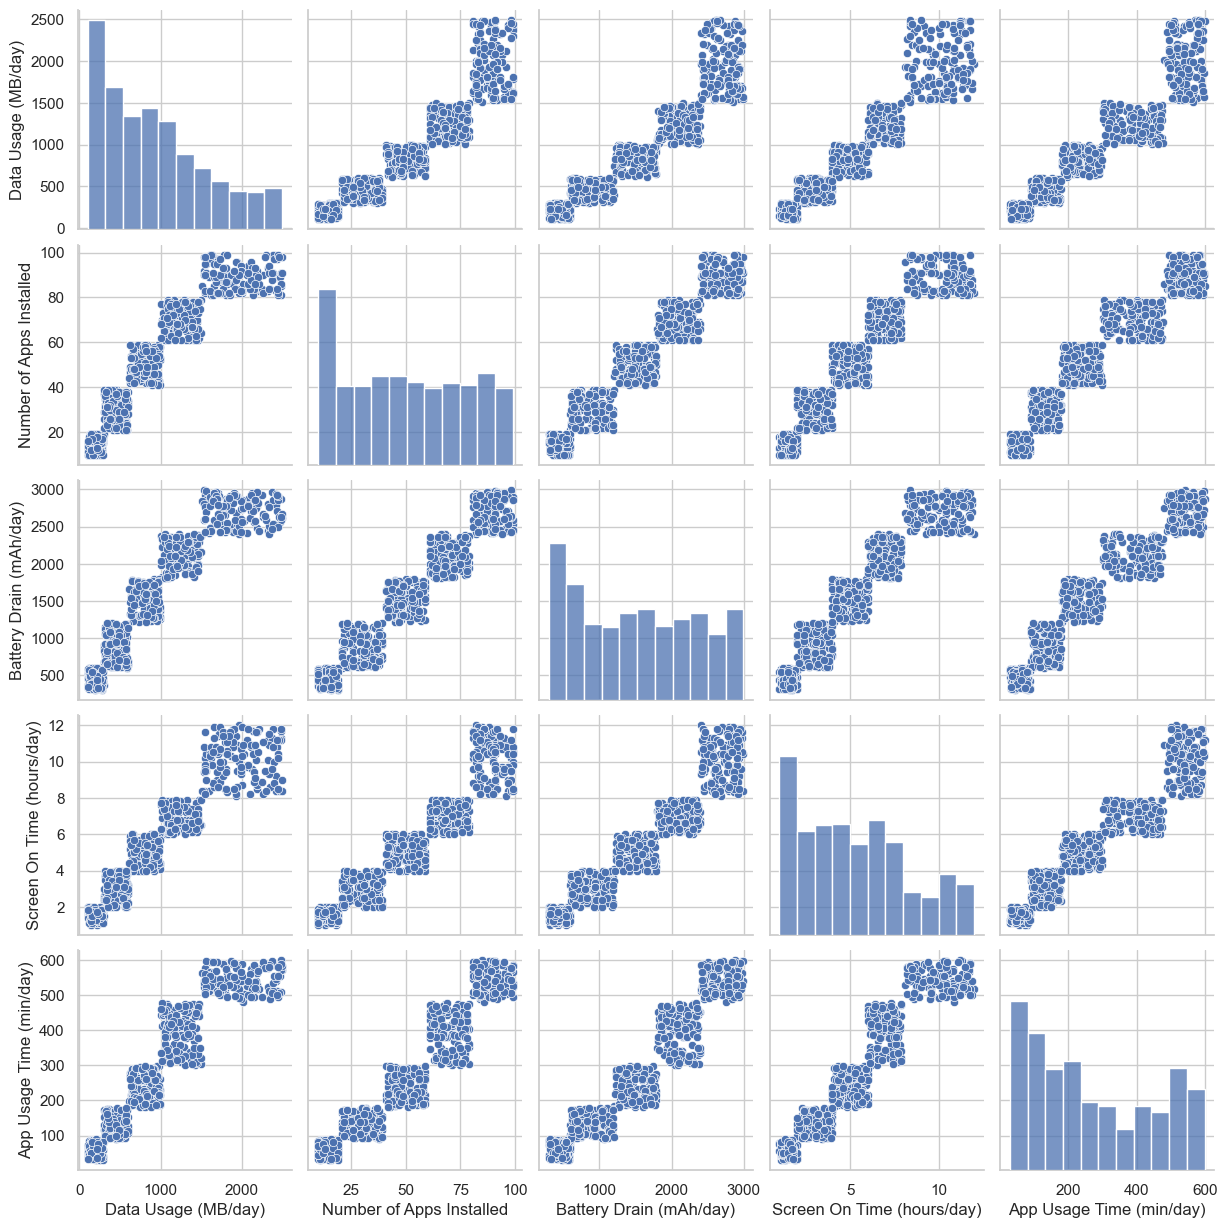

In [46]:
# بررسی ارتباط بین ستونهای عددی
sns.pairplot(df[numeric_features])
plt.show()

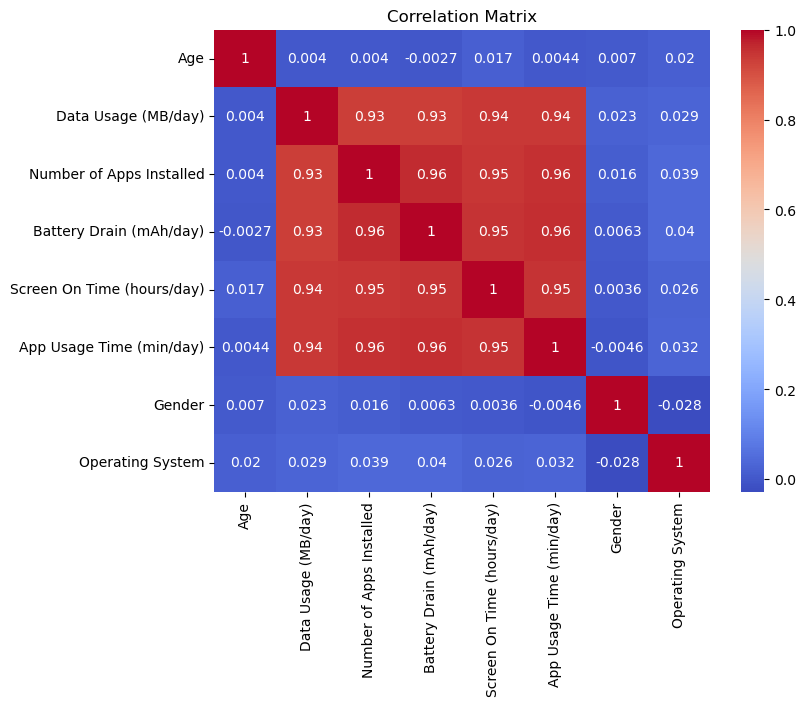

In [13]:
# بررسی ارتباط بین ستونها
all_features = numeric_features + ['Gender', 'Operating System']
plt.figure(figsize=(8, 6))
sns.heatmap(df[all_features].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()